In [1]:
import os
import pandas as pd

# path to your dataset folder (update if needed)
DATA_DIR = "titanic"   # your folder path

def smart_load(path):
    path = os.path.join(DATA_DIR, path)
    ext = os.path.splitext(path)[1].lower()
    if ext in (".csv",):
        return pd.read_csv(path)
    elif ext in (".xls", ".xlsx"):
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unknown extension {ext} for file {path}. Use .csv or .xlsx")

# Example: load train and test (will handle csv or xlsx automatically)
train = smart_load("train.csv") if os.path.exists(os.path.join(DATA_DIR, "train.csv")) else smart_load("train.xlsx")
test  = smart_load("test.csv")  if os.path.exists(os.path.join(DATA_DIR, "test.csv")) else smart_load("test.xlsx")

print("Loaded files:")
print(" - train shape:", train.shape)
print(" - test  shape:", test.shape)
print("\nTrain columns:")
print(list(train.columns))
train.head()


Loaded files:
 - train shape: (891, 12)
 - test  shape: (418, 11)

Train columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
import numpy as np

# Fill missing values safely
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Convert categorical to numbers
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
train = train.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

train.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [4]:
X = train.drop('Survived', axis=1)
y = train['Survived']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 7)
y shape: (891,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (712, 7)
Test size: (179, 7)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=200)
rf_model = RandomForestClassifier(n_estimators=200)
svm_model = SVC(probability=True)

# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


Logistic Regression Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8212290502793296
SVM Accuracy: 0.6536312849162011


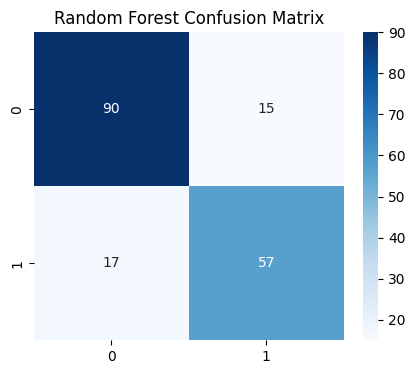

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [9]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Mean:", cv.mean())


Cross Validation Mean: 0.8114744837110036


In [10]:
import joblib

joblib.dump(rf_model, "best_titanic_model.joblib")
print("Model saved successfully!")


Model saved successfully!
